In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
board_size=(4,4)

In [3]:
def read_image(fname):
    arr=imread(fname)
    print("Min and Max",arr.min(),arr.max())    
    
    if any(arr>1):  # if the image is read in as uint8, it's not 0-1 but 0-255, so scale it down
        print("Min and Max",arr.min(),arr.max())
        print("Scaling it down....")
        arr=arr/255
        print("Min and Max",arr.min(),arr.max())    
        
    if len(arr.shape)>2 and arr.shape[2]>3:  # alpha channel
        print("arr shape",arr.shape)
        print("Removing alpha channel")
        arr=arr[:,:,:3]
        print("new arr shape",arr.shape)
        
        
    arr=arr[30:260,45:310]  # change this for your image
    
    return arr

In [4]:
def get_square_size(arr,Nr,Nc,r,c,size=None):
    image_rows,image_cols=arr.shape[:2]
    square_row=int(image_rows/Nr)
    square_col=int(image_cols/Nc)
    
    start_row=int(r*square_row)
    end_row=int((r+1)*square_row)

    start_col=int(c*square_col)
    end_col=int((c+1)*square_col)
    
    if size is None:
        square=arr[start_row:end_row,start_col:end_col]
    else:   
        start_row=int(start_row+(end_row-start_row)/2.0-size[0]/2.0)
        start_col=int(start_col+(end_col-start_col)/2.0-size[1]/2.0)
        
        square=arr[start_row:start_row+size[0],start_col:start_col+size[1]]        
    
        
    return square

Min and Max 5 236
Min and Max 5 236
Scaling it down....
Min and Max 0.0196078431372549 0.9254901960784314


Text(0.5,1,'Image Size: 230,265')

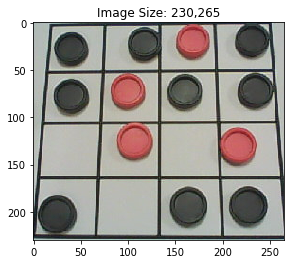

In [5]:
fname='robot images/test9.jpg'
count=1
arr=read_image(fname)
imshow(arr)
title('Image Size: %d,%d' % (arr.shape[0],arr.shape[1]))

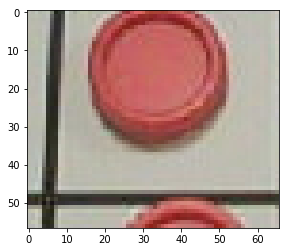

In [6]:
small_square=get_square_size(arr,
                             board_size[0],board_size[1],
                             1,1)
imshow(small_square)

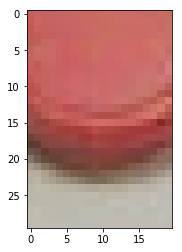

In [7]:
small_square=get_square_size(arr,
                             board_size[0],board_size[1],
                             1,1,
                            (30,20))
imshow(small_square)